Loading dataset...
Training Data Shape: (159999, 14)
Testing Data Shape: (40000, 14)
Preprocessing training data...
Dropping non-numeric columns: ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack']
Preprocessing testing data...
Dropping non-numeric columns: ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack']
Applying GWO for feature selection...
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5
Selected Features (Indices): [ 2  3  4  6  7  9 10]
Visualizing selected features...


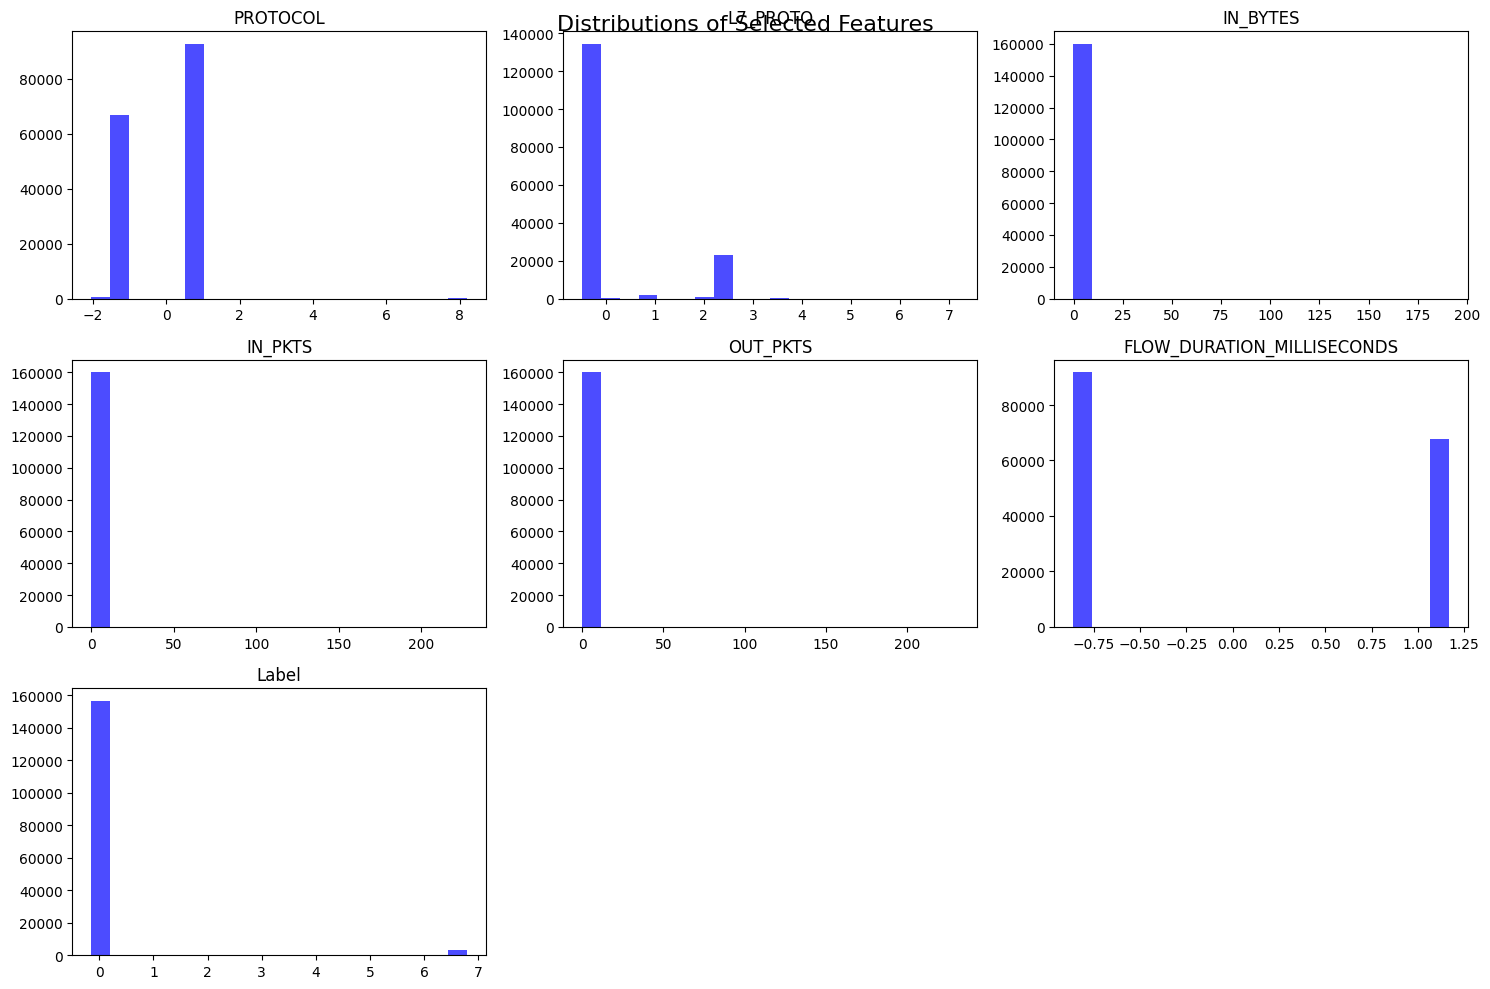


=== Random Forest Classification ===
Random Forest Classification Report:
                precision    recall  f1-score   support

       Benign       1.00      1.00      1.00     39151
Infilteration       1.00      1.00      1.00       849

     accuracy                           1.00     40000
    macro avg       1.00      1.00      1.00     40000
 weighted avg       1.00      1.00      1.00     40000



TypeError: '<' not supported between instances of 'int' and 'str'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the Training and Testing Data
def load_train_test_data(train_path, test_path):
    train_data = pd.read_excel(train_path)
    test_data = pd.read_excel(test_path)
    return train_data, test_data

# Preprocessing the Data
def preprocess_data(data):
    # Drop non-numeric columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
    print(f"Dropping non-numeric columns: {non_numeric_columns.tolist()}")

    X = data[numeric_columns.drop('Attack', errors='ignore')]  # Ensure 'Attack' is excluded from features
    y = data['Attack']

    # Normalize numeric features
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    return pd.DataFrame(X_normalized, columns=X.columns), y

# Modified Binary Grey Wolf Optimization (MBGWO)
def mbgwo(X, y, num_wolves=3, num_iterations=5):  # Reduced wolves and iterations for faster execution
    num_features = X.shape[1]

    # Initialize wolves randomly (binary encoding)
    wolves = np.random.choice([0, 1], size=(num_wolves, num_features))

    # Fitness function: Evaluate using Random Forest accuracy
    def fitness(solution):
        selected_features = np.where(solution == 1)[0]
        if len(selected_features) == 0:
            return 0  # Avoid empty feature sets

        X_selected = X.iloc[:, selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return accuracy_score(y_test, y_pred)

    # Main loop
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")  # Debugging log
        # Evaluate fitness of each wolf
        fitness_values = np.array([fitness(wolf) for wolf in wolves])

        # Rank wolves
        sorted_indices = np.argsort(-fitness_values)  # Descending order
        alpha, beta, delta = wolves[sorted_indices[:3]]

        # Update positions of wolves
        for i in range(num_wolves):
            if np.array_equal(wolves[i], alpha):
                continue
            wolves[i] = np.random.choice([0, 1], size=num_features)  # Replace with modified update logic

    # Return best solution
    best_solution = wolves[np.argmax([fitness(wolf) for wolf in wolves])]
    return best_solution

# Classification with Random Forest
def classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features):
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Explicitly pass labels
    print("Confusion Matrix:\n", cm)
    return y_test, y_pred

# Visualization of Selected Features
def visualize_selected_features(X, selected_features, y):
    selected_feature_names = [X.columns[i] for i in selected_features]
    selected_features_df = X.iloc[:, selected_features].copy()  # Fix: Use .copy() to avoid SettingWithCopyWarning
    selected_features_df['Attack'] = y.values

    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(selected_feature_names):
        plt.subplot(3, 3, i + 1)
        plt.hist(selected_features_df[feature], bins=20, alpha=0.7, color='blue')
        plt.title(feature)
        plt.tight_layout()

    plt.suptitle('Distributions of Selected Features', fontsize=16)
    plt.show()

# Main Function
def main():
    # File paths
    train_file_path = r"C:\Users\PMLS\Downloads\IDS DATA SET\IDS_train_split.xlsx"
    test_file_path = r"C:\Users\PMLS\Downloads\IDS DATA SET\IDS_test_split.xlsx"

    # Load the dataset
    print("Loading dataset...")
    train_data, test_data = load_train_test_data(train_file_path, test_file_path)
    print(f"Training Data Shape: {train_data.shape}")
    print(f"Testing Data Shape: {test_data.shape}")

    # Preprocess the train and test datasets
    print("Preprocessing training data...")
    X_train, y_train = preprocess_data(train_data)
    print("Preprocessing testing data...")
    X_test, y_test = preprocess_data(test_data)

    # Perform feature selection using MBGWO on the training data
    print("Applying GWO for feature selection...")
    best_features = mbgwo(X_train, y_train)
    selected_features = np.where(best_features == 1)[0]
    print("Selected Features (Indices):", selected_features)

    # Visualize selected features from the training data
    print("Visualizing selected features...")
    visualize_selected_features(X_train, selected_features, y_train)

    # Train and evaluate Random Forest
    print("\n=== Random Forest Classification ===")
    classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features)

    print("Program completed successfully.")

if __name__ == "__main__":
    main()


Loading dataset...
Training Data Shape: (159999, 14)
Testing Data Shape: (40000, 14)
Preprocessing training data...
Dropping non-numeric columns: ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack']
Converting 'Attack' column to numeric...
Preprocessing testing data...
Dropping non-numeric columns: ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack']
Converting 'Attack' column to numeric...
Applying GWO for feature selection...
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5
Selected Features (Indices): [ 0  1  4  7  9 10]
Visualizing selected features...


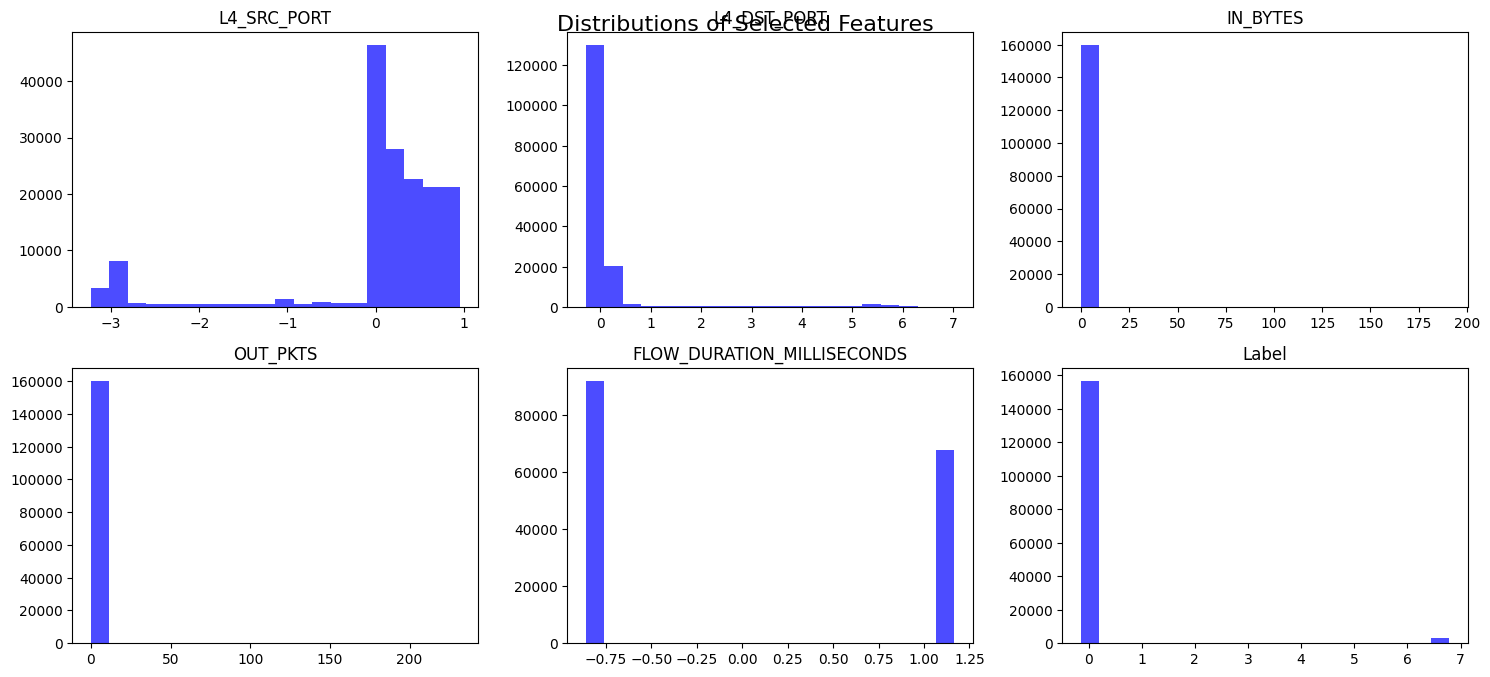


=== Random Forest Classification ===
y_test type: int32, y_pred type: <class 'numpy.int32'>
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39151
           1       1.00      1.00      1.00       849

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

Confusion Matrix:
 [[39151     0]
 [    0   849]]
Program completed successfully.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the Training and Testing Data
def load_train_test_data(train_path, test_path):
    train_data = pd.read_excel(train_path)
    test_data = pd.read_excel(test_path)
    return train_data, test_data

# Preprocessing the Data
def preprocess_data(data):
    # Drop non-numeric columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
    print(f"Dropping non-numeric columns: {non_numeric_columns.tolist()}")

    X = data[numeric_columns.drop('Attack', errors='ignore')]  # Ensure 'Attack' is excluded from features
    
    # Convert 'Attack' column to numeric
    if 'Attack' in data.columns:
        print("Converting 'Attack' column to numeric...")
        y = data['Attack'].map({'Benign': 0, 'Infilteration': 1}).astype(int)
    else:
        raise ValueError("'Attack' column not found in the dataset.")

    # Normalize numeric features
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    return pd.DataFrame(X_normalized, columns=X.columns), y

# Modified Binary Grey Wolf Optimization (MBGWO)
def mbgwo(X, y, num_wolves=3, num_iterations=5):  # Reduced wolves and iterations for faster execution
    num_features = X.shape[1]

    # Initialize wolves randomly (binary encoding)
    wolves = np.random.choice([0, 1], size=(num_wolves, num_features))

    # Fitness function: Evaluate using Random Forest accuracy
    def fitness(solution):
        selected_features = np.where(solution == 1)[0]
        if len(selected_features) == 0:
            return 0  # Avoid empty feature sets

        X_selected = X.iloc[:, selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return accuracy_score(y_test, y_pred)

    # Main loop
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")  # Debugging log
        # Evaluate fitness of each wolf
        fitness_values = np.array([fitness(wolf) for wolf in wolves])

        # Rank wolves
        sorted_indices = np.argsort(-fitness_values)  # Descending order
        alpha, beta, delta = wolves[sorted_indices[:3]]

        # Update positions of wolves
        for i in range(num_wolves):
            if np.array_equal(wolves[i], alpha):
                continue
            wolves[i] = np.random.choice([0, 1], size=num_features)  # Replace with modified update logic

    # Return best solution
    best_solution = wolves[np.argmax([fitness(wolf) for wolf in wolves])]
    return best_solution

# Classification with Random Forest
def classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features):
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # Debugging: Check data types
    print(f"y_test type: {y_test.dtype}, y_pred type: {type(y_pred[0])}")
    
    print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Explicitly pass numeric labels
    print("Confusion Matrix:\n", cm)
    return y_test, y_pred

# Visualization of Selected Features
def visualize_selected_features(X, selected_features, y):
    selected_feature_names = [X.columns[i] for i in selected_features]
    selected_features_df = X.iloc[:, selected_features].copy()  # Fix: Use .copy() to avoid SettingWithCopyWarning
    selected_features_df['Attack'] = y.values

    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(selected_feature_names):
        plt.subplot(3, 3, i + 1)
        plt.hist(selected_features_df[feature], bins=20, alpha=0.7, color='blue')
        plt.title(feature)
        plt.tight_layout()

    plt.suptitle('Distributions of Selected Features', fontsize=16)
    plt.show()

# Main Function
def main():
    # File paths
    train_file_path = r"C:\Users\PMLS\Downloads\IDS DATA SET\IDS_train_split.xlsx"
    test_file_path = r"C:\Users\PMLS\Downloads\IDS DATA SET\IDS_test_split.xlsx"

    # Load the dataset
    print("Loading dataset...")
    train_data, test_data = load_train_test_data(train_file_path, test_file_path)
    print(f"Training Data Shape: {train_data.shape}")
    print(f"Testing Data Shape: {test_data.shape}")

    # Preprocess the train and test datasets
    print("Preprocessing training data...")
    X_train, y_train = preprocess_data(train_data)
    print("Preprocessing testing data...")
    X_test, y_test = preprocess_data(test_data)

    # Perform feature selection using MBGWO on the training data
    print("Applying GWO for feature selection...")
    best_features = mbgwo(X_train, y_train)
    selected_features = np.where(best_features == 1)[0]
    print("Selected Features (Indices):", selected_features)

    # Visualize selected features from the training data
    print("Visualizing selected features...")
    visualize_selected_features(X_train, selected_features, y_train)

    # Train and evaluate Random Forest
    print("\n=== Random Forest Classification ===")
    classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features)

    print("Program completed successfully.")

if __name__ == "__main__":
    main()


Loading dataset...
Training Data Shape: (159999, 14)
Testing Data Shape: (40000, 14)
Preprocessing training data...
Dropping non-numeric columns: ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack']
Converting 'Attack' column to numeric...
Preprocessing testing data...
Dropping non-numeric columns: ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack']
Converting 'Attack' column to numeric...
Applying GWO for feature selection...
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5
Selected Features (Indices): [ 0  1  2  3  4  5  7 10]
Visualizing selected features...


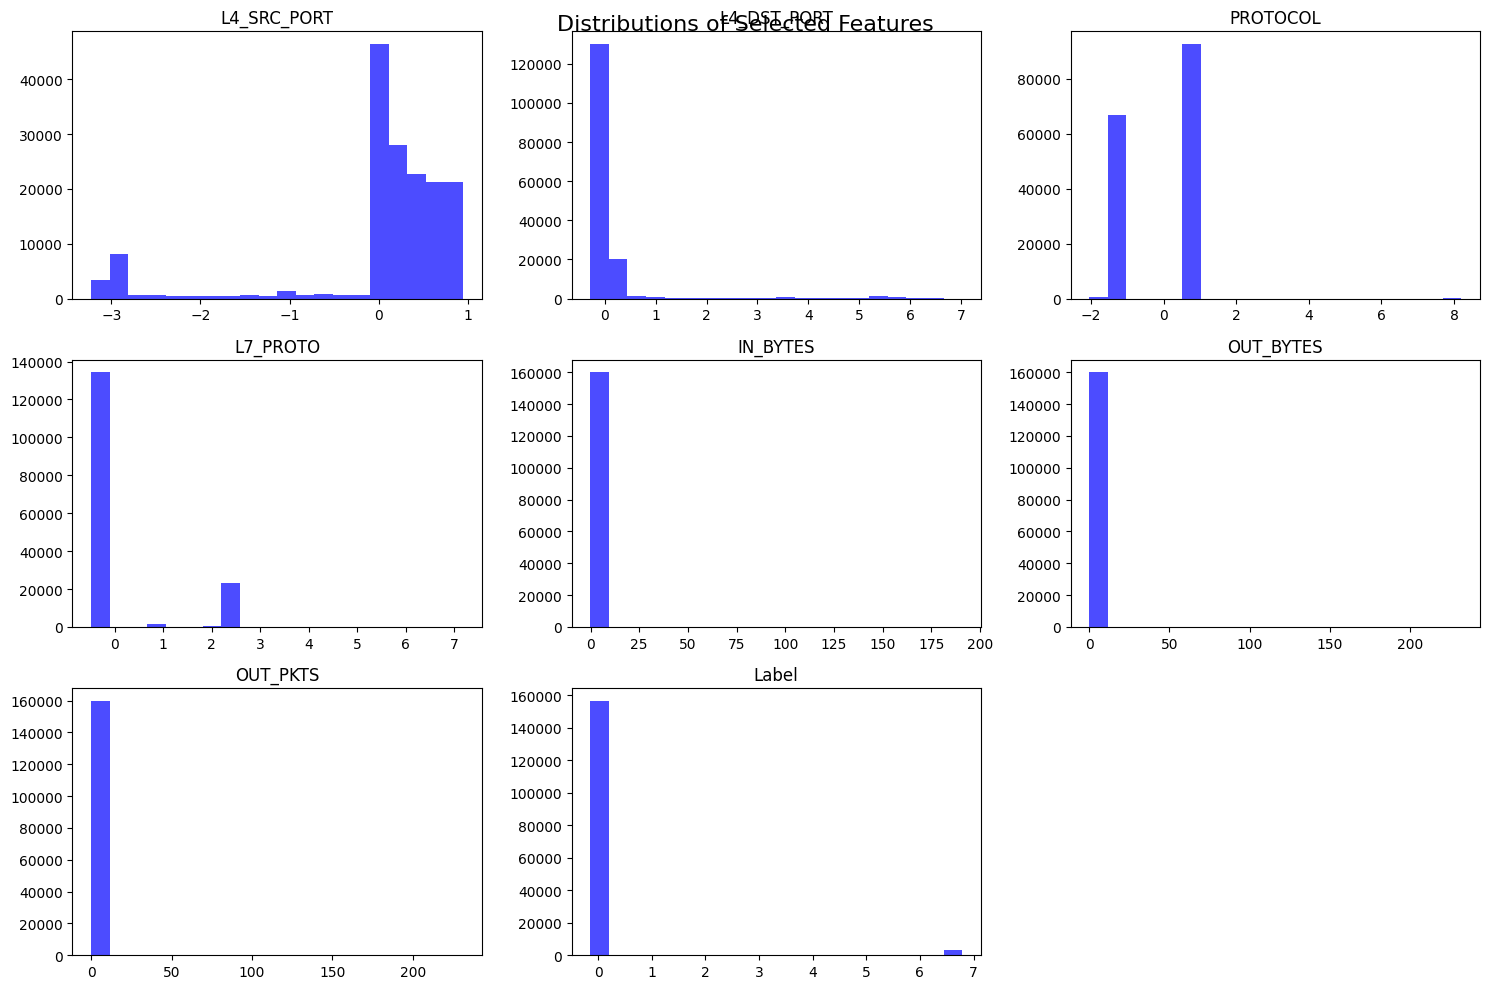


=== Random Forest Classification ===
y_test type: int32, y_pred type: <class 'numpy.int32'>
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39151
           1       1.00      1.00      1.00       849

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

Confusion Matrix:
 [[39151     0]
 [    0   849]]
Program completed successfully.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the Training and Testing Data
def load_train_test_data(train_path, test_path):
    train_data = pd.read_excel(train_path)
    test_data = pd.read_excel(test_path)
    return train_data, test_data

# Preprocessing the Data
def preprocess_data(data):
    # Drop non-numeric columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
    print(f"Dropping non-numeric columns: {non_numeric_columns.tolist()}")

    X = data[numeric_columns.drop('Attack', errors='ignore')]  # Ensure 'Attack' is excluded from features
    
    # Convert 'Attack' column to numeric
    if 'Attack' in data.columns:
        print("Converting 'Attack' column to numeric...")
        y = data['Attack'].map({'Benign': 0, 'Infilteration': 1}).astype(int)
    else:
        raise ValueError("'Attack' column not found in the dataset.")

    # Normalize numeric features
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    return pd.DataFrame(X_normalized, columns=X.columns), y

# Modified Binary Grey Wolf Optimization (MBGWO)
def mbgwo(X, y, num_wolves=3, num_iterations=5):  # Reduced wolves and iterations for faster execution
    num_features = X.shape[1]

    # Initialize wolves randomly (binary encoding)
    wolves = np.random.choice([0, 1], size=(num_wolves, num_features))

    # Fitness function: Evaluate using Random Forest accuracy
    def fitness(solution):
        selected_features = np.where(solution == 1)[0]
        if len(selected_features) == 0:
            return 0  # Avoid empty feature sets

        X_selected = X.iloc[:, selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return accuracy_score(y_test, y_pred)

    # Main loop
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")  # Debugging log
        # Evaluate fitness of each wolf
        fitness_values = np.array([fitness(wolf) for wolf in wolves])

        # Rank wolves
        sorted_indices = np.argsort(-fitness_values)  # Descending order
        alpha, beta, delta = wolves[sorted_indices[:3]]

        # Update positions of wolves
        for i in range(num_wolves):
            if np.array_equal(wolves[i], alpha):
                continue
            wolves[i] = np.random.choice([0, 1], size=num_features)  # Replace with modified update logic

    # Return best solution
    best_solution = wolves[np.argmax([fitness(wolf) for wolf in wolves])]
    return best_solution

# Classification with Random Forest
def classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features):
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # Debugging: Check data types
    print(f"y_test type: {y_test.dtype}, y_pred type: {type(y_pred[0])}")
    
    print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Explicitly pass numeric labels
    print("Confusion Matrix:\n", cm)
    return y_test, y_pred

# Visualization of Selected Features
def visualize_selected_features(X, selected_features, y):
    selected_feature_names = [X.columns[i] for i in selected_features]
    selected_features_df = X.iloc[:, selected_features].copy()  # Fix: Use .copy() to avoid SettingWithCopyWarning
    selected_features_df['Attack'] = y.values

    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(selected_feature_names):
        plt.subplot(3, 3, i + 1)
        plt.hist(selected_features_df[feature], bins=20, alpha=0.7, color='blue')
        plt.title(feature)
        plt.tight_layout()

    plt.suptitle('Distributions of Selected Features', fontsize=16)
    plt.show()

# Main Function
def main():
    # File paths
    train_file_path = r"C:\Users\PMLS\Downloads\IDS DATA SET\IDS_train_split.xlsx"
    test_file_path = r"C:\Users\PMLS\Downloads\IDS DATA SET\IDS_test_split.xlsx"

    # Load the dataset
    print("Loading dataset...")
    train_data, test_data = load_train_test_data(train_file_path, test_file_path)
    print(f"Training Data Shape: {train_data.shape}")
    print(f"Testing Data Shape: {test_data.shape}")

    # Preprocess the train and test datasets
    print("Preprocessing training data...")
    X_train, y_train = preprocess_data(train_data)
    print("Preprocessing testing data...")
    X_test, y_test = preprocess_data(test_data)

    # Perform feature selection using MBGWO on the training data
    print("Applying GWO for feature selection...")
    best_features = mbgwo(X_train, y_train)
    selected_features = np.where(best_features == 1)[0]
    print("Selected Features (Indices):", selected_features)

    # Visualize selected features from the training data
    print("Visualizing selected features...")
    visualize_selected_features(X_train, selected_features, y_train)

    # Train and evaluate Random Forest
    print("\n=== Random Forest Classification ===")
    classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features)

    print("Program completed successfully.")

if __name__ == "__main__":
    main()


Loading dataset...
Training Data Shape: (159999, 14)
Testing Data Shape: (40000, 14)
Preprocessing training data...
Dropping non-numeric columns: ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack']
Converting 'Attack' column to numeric...
Preprocessing testing data...
Dropping non-numeric columns: ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack']
Converting 'Attack' column to numeric...
Applying GWO for feature selection...
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5
Selected Features (Indices): [ 3  4  5  7  8  9 10]
Visualizing selected features...


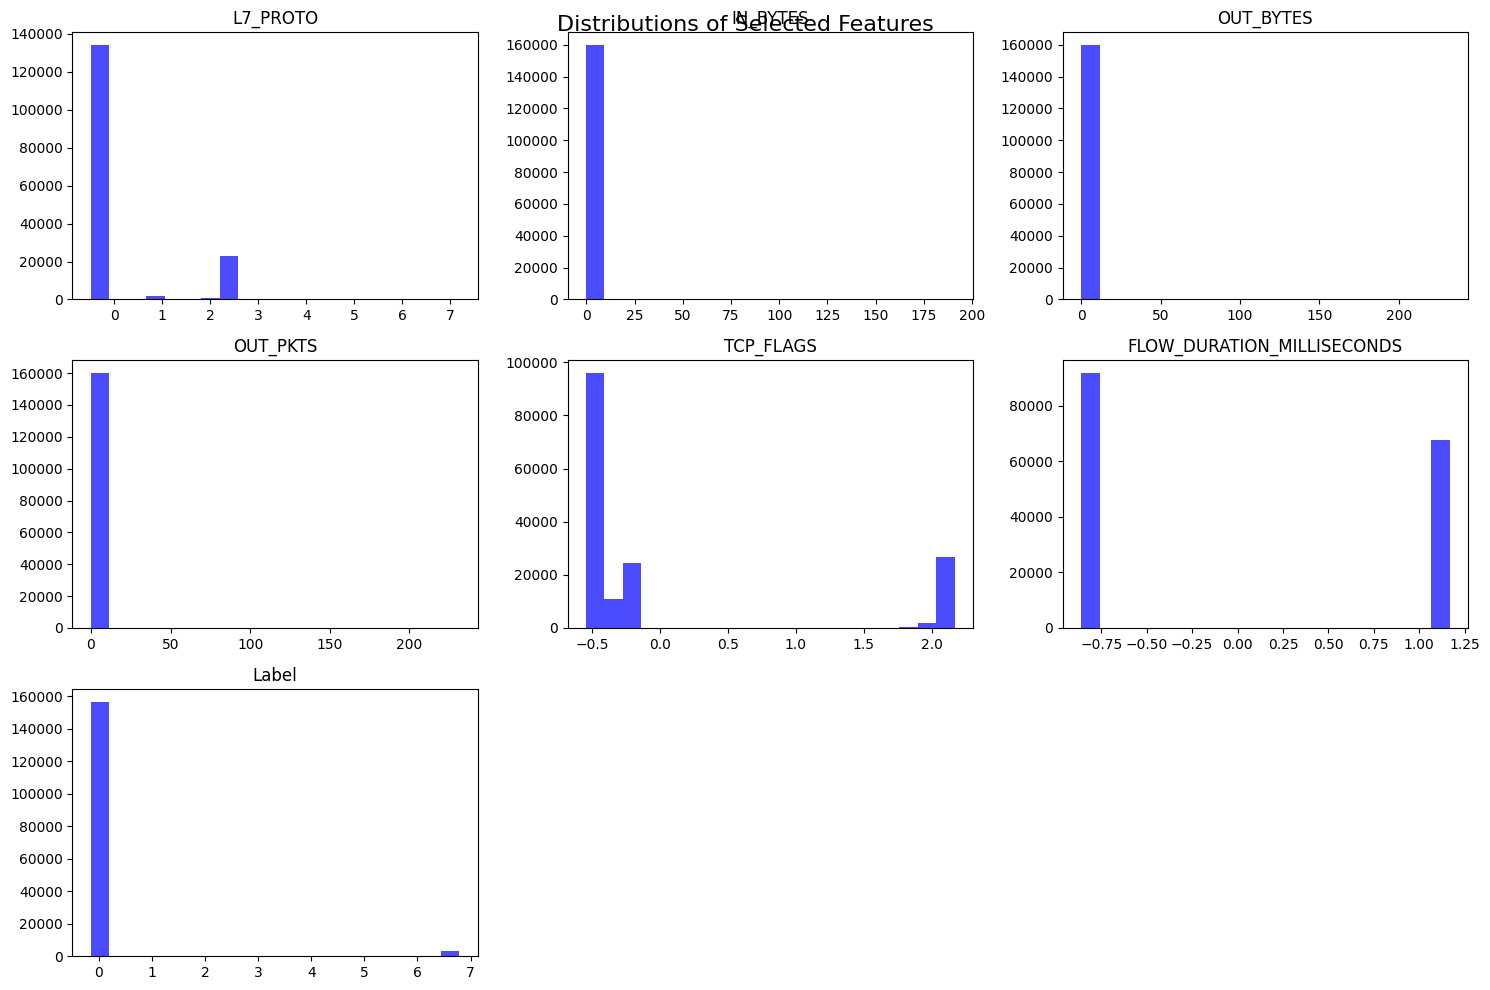


=== Random Forest Classification ===
y_test type: int32, y_pred type: <class 'numpy.int32'>
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39151
           1       1.00      1.00      1.00       849

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

Confusion Matrix:
 [[39151     0]
 [    0   849]]
Program completed successfully.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the Training and Testing Data
def load_train_test_data(train_path, test_path):
    train_data = pd.read_excel(train_path)
    test_data = pd.read_excel(test_path)
    return train_data, test_data

# Preprocessing the Data
def preprocess_data(data):
    # Drop non-numeric columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
    print(f"Dropping non-numeric columns: {non_numeric_columns.tolist()}")

    X = data[numeric_columns.drop('Attack', errors='ignore')]  # Ensure 'Attack' is excluded from features
    
    # Convert 'Attack' column to numeric
    if 'Attack' in data.columns:
        print("Converting 'Attack' column to numeric...")
        y = data['Attack'].map({'Benign': 0, 'Infilteration': 1}).astype(int)
    else:
        raise ValueError("'Attack' column not found in the dataset.")

    # Normalize numeric features
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    return pd.DataFrame(X_normalized, columns=X.columns), y

# Modified Binary Grey Wolf Optimization (MBGWO)
def mbgwo(X, y, num_wolves=5, num_iterations=5):  # Reduced wolves and iterations for faster execution
    num_features = X.shape[1]

    # Initialize wolves randomly (binary encoding)
    wolves = np.random.choice([0, 1], size=(num_wolves, num_features))

    # Fitness function: Evaluate using Random Forest accuracy
    def fitness(solution):
        selected_features = np.where(solution == 1)[0]
        if len(selected_features) == 0:
            return 0  # Avoid empty feature sets

        X_selected = X.iloc[:, selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return accuracy_score(y_test, y_pred)

    # Main loop
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")  # Debugging log
        # Evaluate fitness of each wolf
        fitness_values = np.array([fitness(wolf) for wolf in wolves])

        # Rank wolves
        sorted_indices = np.argsort(-fitness_values)  # Descending order
        alpha, beta, delta = wolves[sorted_indices[:3]]

        # Update positions of wolves
        for i in range(num_wolves):
            if np.array_equal(wolves[i], alpha):
                continue
            wolves[i] = np.random.choice([0, 1], size=num_features)  # Replace with modified update logic

    # Return best solution
    best_solution = wolves[np.argmax([fitness(wolf) for wolf in wolves])]
    return best_solution

# Classification with Random Forest
def classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features):
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    model = RandomForestClassifier(random_state=42)

    
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # Debugging: Check data types
    print(f"y_test type: {y_test.dtype}, y_pred type: {type(y_pred[0])}")
    
    print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Explicitly pass numeric labels
    print("Confusion Matrix:\n", cm)
    return y_test, y_pred

# Visualization of Selected Features
def visualize_selected_features(X, selected_features, y):
    selected_feature_names = [X.columns[i] for i in selected_features]
    selected_features_df = X.iloc[:, selected_features].copy()  # Fix: Use .copy() to avoid SettingWithCopyWarning
    selected_features_df['Attack'] = y.values

    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(selected_feature_names):
        plt.subplot(3, 3, i + 1)
        plt.hist(selected_features_df[feature], bins=20, alpha=0.7, color='blue')
        plt.title(feature)
        plt.tight_layout()

    plt.suptitle('Distributions of Selected Features', fontsize=16)
    plt.show()

# Main Function
def main():
    # File paths
    train_file_path = r"C:\Users\PMLS\Downloads\IDS DATA SET\IDS_train_split.xlsx"
    test_file_path = r"C:\Users\PMLS\Downloads\IDS DATA SET\IDS_test_split.xlsx"

    # Load the dataset
    print("Loading dataset...")
    train_data, test_data = load_train_test_data(train_file_path, test_file_path)
    print(f"Training Data Shape: {train_data.shape}")
    print(f"Testing Data Shape: {test_data.shape}")

    # Preprocess the train and test datasets
    print("Preprocessing training data...")
    X_train, y_train = preprocess_data(train_data)
    print("Preprocessing testing data...")
    X_test, y_test = preprocess_data(test_data)

    # Perform feature selection using MBGWO on the training data
    print("Applying GWO for feature selection...")
    best_features = mbgwo(X_train, y_train)
    selected_features = np.where(best_features == 1)[0]
    print("Selected Features (Indices):", selected_features)

    # Visualize selected features from the training data
    print("Visualizing selected features...")
    visualize_selected_features(X_train, selected_features, y_train)

    # Train and evaluate Random Forest
    print("\n=== Random Forest Classification ===")
    classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features)

    print("Program completed successfully.")

if __name__ == "__main__":
    main()


In [2]:
import tkinter as tk
from tkinter import messagebox

def generate_results():
    # Get user input
    runs = int(entry_runs.get())
    population = int(entry_population.get())
    iterations = int(entry_iterations.get())
    optimizer_function = entry_optimizer.get()
    
    # Validate input
    if optimizer_function not in ['GWO', 'bGWO']:
        messagebox.showerror("Error", "Please enter a valid optimizer function (GWO or bGWO).")
        return
    
    # Call the MBGWO algorithm and classification models
    # Implement data preprocessing, feature selection, and model evaluation
    messagebox.showinfo("Results", "Feature selection and classification completed successfully!")

# Create GUI window
root = tk.Tk()
root.title("Intrusion Detection System using GWO")

# Add parameters input fields
tk.Label(root, text="Enter number of runs:").grid(row=0, column=0, padx=10, pady=5)
entry_runs = tk.Entry(root)
entry_runs.grid(row=0, column=1, padx=10, pady=5)

tk.Label(root, text="Enter number of population:").grid(row=1, column=0, padx=10, pady=5)
entry_population = tk.Entry(root)
entry_population.grid(row=1, column=1, padx=10, pady=5)

tk.Label(root, text="Enter number of iterations:").grid(row=2, column=0, padx=10, pady=5)
entry_iterations = tk.Entry(root)
entry_iterations.grid(row=2, column=1, padx=10, pady=5)

tk.Label(root, text="Type the optimizer function:").grid(row=3, column=0, padx=10, pady=5)
entry_optimizer = tk.Entry(root)
entry_optimizer.grid(row=3, column=1, padx=10, pady=5)

# Add generate button
generate_button = tk.Button(root, text="Generate", command=generate_results, bg="red", fg="white")
generate_button.grid(row=4, column=0, columnspan=2, pady=10)

root.mainloop()


In [3]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Functions for Preprocessing
def preprocess_data(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
    print(f"Dropping non-numeric columns: {non_numeric_columns.tolist()}")

    X = data[numeric_columns.drop('Attack', errors='ignore')]

    if 'Attack' in data.columns:
        print("Converting 'Attack' column to numeric...")
        y = data['Attack'].map({'Benign': 0, 'Infilteration': 1}).astype(int)
    else:
        raise ValueError("'Attack' column not found in the dataset.")

    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    return pd.DataFrame(X_normalized, columns=X.columns), y

# Modified Binary Grey Wolf Optimization
def mbgwo(X, y, num_wolves, num_iterations):
    num_features = X.shape[1]
    wolves = np.random.choice([0, 1], size=(num_wolves, num_features))

    def fitness(solution):
        selected_features = np.where(solution == 1)[0]
        if len(selected_features) == 0:
            return 0
        X_selected = X.iloc[:, selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return accuracy_score(y_test, y_pred)

    for iteration in range(num_iterations):
        fitness_values = np.array([fitness(wolf) for wolf in wolves])
        sorted_indices = np.argsort(-fitness_values)
        alpha, beta, delta = wolves[sorted_indices[:3]]

        for i in range(num_wolves):
            if np.array_equal(wolves[i], alpha):
                continue
            wolves[i] = np.random.choice([0, 1], size=num_features)

    best_solution = wolves[np.argmax([fitness(wolf) for wolf in wolves])]
    return best_solution

# Classification with Random Forest
def classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features):
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    print("Confusion Matrix:\n", cm)
    return y_test, y_pred

# GUI Functionality
def generate_results():
    try:
        # Input parameters
        runs = int(entry_runs.get())
        population = int(entry_population.get())
        iterations = int(entry_iterations.get())
        optimizer_function = entry_optimizer.get()

        if optimizer_function not in ['GWO', 'bGWO']:
            messagebox.showerror("Error", "Enter a valid optimizer function (GWO or bGWO).")
            return

        # File paths
        train_file_path = r"IDS_train_split.xlsx"  # Update with actual path
        test_file_path = r"IDS_test_split.xlsx"  # Update with actual path

        # Load data
        train_data = pd.read_excel(train_file_path)
        test_data = pd.read_excel(test_file_path)

        # Preprocess data
        X_train, y_train = preprocess_data(train_data)
        X_test, y_test = preprocess_data(test_data)

        # Feature selection
        best_features = mbgwo(X_train, y_train, population, iterations)
        selected_features = np.where(best_features == 1)[0]

        # Classification with Random Forest
        y_test_rf, y_pred_rf = classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features)

        # Display results
        messagebox.showinfo("Results", f"Selected Features: {selected_features}\nRandom Forest Accuracy: {accuracy_score(y_test_rf, y_pred_rf):.2f}")

    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI Setup
root = tk.Tk()
root.title("Intrusion Detection System using GWO")

# Input fields
tk.Label(root, text="Enter number of runs:").grid(row=0, column=0, padx=10, pady=5)
entry_runs = tk.Entry(root)
entry_runs.grid(row=0, column=1, padx=10, pady=5)

tk.Label(root, text="Enter number of population:").grid(row=1, column=0, padx=10, pady=5)
entry_population = tk.Entry(root)
entry_population.grid(row=1, column=1, padx=10, pady=5)

tk.Label(root, text="Enter number of iterations:").grid(row=2, column=0, padx=10, pady=5)
entry_iterations = tk.Entry(root)
entry_iterations.grid(row=2, column=1, padx=10, pady=5)

tk.Label(root, text="Type the optimizer function:").grid(row=3, column=0, padx=10, pady=5)
entry_optimizer = tk.Entry(root)
entry_optimizer.grid(row=3, column=1, padx=10, pady=5)

# Generate button
generate_button = tk.Button(root, text="Generate", command=generate_results, bg="red", fg="white")
generate_button.grid(row=4, column=0, columnspan=2, pady=10)

root.mainloop()


In [4]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the Training and Testing Data
def load_train_test_data(train_path, test_path):
    train_data = pd.read_excel(train_path)
    test_data = pd.read_excel(test_path)
    return train_data, test_data

# Preprocessing the Data
def preprocess_data(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
    print(f"Dropping non-numeric columns: {non_numeric_columns.tolist()}")

    X = data[numeric_columns.drop('Attack', errors='ignore')]  # Ensure 'Attack' is excluded from features

    if 'Attack' in data.columns:
        print("Converting 'Attack' column to numeric...")
        y = data['Attack'].map({'Benign': 0, 'Infilteration': 1}).astype(int)
    else:
        raise ValueError("'Attack' column not found in the dataset.")

    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    return pd.DataFrame(X_normalized, columns=X.columns), y

# Modified Binary Grey Wolf Optimization (MBGWO)
def mbgwo(X, y, num_wolves=5, num_iterations=5):
    num_features = X.shape[1]
    wolves = np.random.choice([0, 1], size=(num_wolves, num_features))

    def fitness(solution):
        selected_features = np.where(solution == 1)[0]
        if len(selected_features) == 0:
            return 0
        X_selected = X.iloc[:, selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return accuracy_score(y_test, y_pred)

    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        fitness_values = np.array([fitness(wolf) for wolf in wolves])
        sorted_indices = np.argsort(-fitness_values)
        alpha, beta, delta = wolves[sorted_indices[:3]]

        for i in range(num_wolves):
            if np.array_equal(wolves[i], alpha):
                continue
            wolves[i] = np.random.choice([0, 1], size=num_features)

    best_solution = wolves[np.argmax([fitness(wolf) for wolf in wolves])]
    return best_solution

# Classification with Random Forest
def classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features):
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    print("Confusion Matrix:\n", cm)
    return accuracy_score(y_test, y_pred)

# GUI Functionality
def generate_results():
    train_file_path = r"C:\Users\PMLS\Downloads\IDS DATA SET\IDS_train_split.xlsx"
    test_file_path = r"C:\Users\PMLS\Downloads\IDS DATA SET\IDS_test_split.xlsx"

    try:
        # Input parameters
        population = int(entry_population.get())
        iterations = int(entry_iterations.get())

        # Load data
        train_data, test_data = load_train_test_data(train_file_path, test_file_path)

        # Preprocess data
        X_train, y_train = preprocess_data(train_data)
        X_test, y_test = preprocess_data(test_data)

        # Feature selection
        best_features = mbgwo(X_train, y_train, population, iterations)
        selected_features = np.where(best_features == 1)[0]

        # Classification with Random Forest
        accuracy = classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features)

        # Display results
        messagebox.showinfo("Results", f"Selected Features: {selected_features}\nRandom Forest Accuracy: {accuracy:.2f}")

    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI Setup
root = tk.Tk()
root.title("Intrusion Detection System using GWO")

# Input fields
tk.Label(root, text="Enter number of population:").grid(row=0, column=0, padx=10, pady=5)
entry_population = tk.Entry(root)
entry_population.grid(row=0, column=1, padx=10, pady=5)

tk.Label(root, text="Enter number of iterations:").grid(row=1, column=0, padx=10, pady=5)
entry_iterations = tk.Entry(root)
entry_iterations.grid(row=1, column=1, padx=10, pady=5)

# Generate button
generate_button = tk.Button(root, text="Generate Results", command=generate_results, bg="red", fg="white")
generate_button.grid(row=2, column=0, columnspan=2, pady=10)

root.mainloop()


Dropping non-numeric columns: ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack']
Converting 'Attack' column to numeric...
Dropping non-numeric columns: ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack']
Converting 'Attack' column to numeric...
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39151
           1       1.00      1.00      1.00       849

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

Confusion Matrix:
 [[39151     0]
 [    0   849]]


In [5]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the Training and Testing Data
def load_train_test_data(train_path, test_path):
    train_data = pd.read_excel(train_path)
    test_data = pd.read_excel(test_path)
    return train_data, test_data

# Preprocessing the Data
def preprocess_data(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
    print(f"Dropping non-numeric columns: {non_numeric_columns.tolist()}")

    X = data[numeric_columns.drop('Attack', errors='ignore')]  # Ensure 'Attack' is excluded from features

    if 'Attack' in data.columns:
        print("Converting 'Attack' column to numeric...")
        y = data['Attack'].map({'Benign': 0, 'Infilteration': 1}).astype(int)
    else:
        raise ValueError("'Attack' column not found in the dataset.")

    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    return pd.DataFrame(X_normalized, columns=X.columns), y

# Modified Binary Grey Wolf Optimization (MBGWO)
def mbgwo(X, y, num_wolves=5, num_iterations=5):
    num_features = X.shape[1]
    wolves = np.random.choice([0, 1], size=(num_wolves, num_features))

    def fitness(solution):
        selected_features = np.where(solution == 1)[0]
        if len(selected_features) == 0:
            return 0
        X_selected = X.iloc[:, selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return accuracy_score(y_test, y_pred)

    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        fitness_values = np.array([fitness(wolf) for wolf in wolves])
        sorted_indices = np.argsort(-fitness_values)
        alpha, beta, delta = wolves[sorted_indices[:3]]

        for i in range(num_wolves):
            if np.array_equal(wolves[i], alpha):
                continue
            wolves[i] = np.random.choice([0, 1], size=num_features)

    best_solution = wolves[np.argmax([fitness(wolf) for wolf in wolves])]
    return best_solution

# Classification with Random Forest
def classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features):
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    print("Confusion Matrix:\n", cm)
    return classification_report(y_test, y_pred, output_dict=True), accuracy_score(y_test, y_pred)

# GUI Functionality
def generate_results():
    train_file_path = r"C:\Users\PMLS\Downloads\IDS DATA SET\IDS_train_split.xlsx"
    test_file_path = r"C:\Users\PMLS\\Downloads\IDS DATA SET\IDS_test_split.xlsx"

    try:
        # Input parameters
        runs = int(entry_runs.get())
        population = int(entry_population.get())
        iterations = int(entry_iterations.get())
        optimizer_function = entry_optimizer.get()

        if optimizer_function not in ['GWO', 'bGWO']:
            messagebox.showerror("Error", "Please enter a valid optimizer function (GWO or bGWO).")
            return

        # Load data
        train_data, test_data = load_train_test_data(train_file_path, test_file_path)

        # Preprocess data
        X_train, y_train = preprocess_data(train_data)
        X_test, y_test = preprocess_data(test_data)

        # Feature selection
        best_features = mbgwo(X_train, y_train, population, iterations)
        selected_features = np.where(best_features == 1)[0]

        # Classification with Random Forest
        classification_results, accuracy = classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features)

        # Display results
        results_text = f"Best Accuracy: {accuracy * 100:.2f}%\n"
        results_text += f"Selected Features Count: {len(selected_features)}\n"
        results_text += f"Selected Features (Indices): {selected_features.tolist()}\n\n"
        results_text += "Classification Report:\n"
        for key, value in classification_results.items():
            if isinstance(value, dict):
                results_text += f"{key}: Precision: {value['precision']:.2f}, Recall: {value['recall']:.2f}, F1-Score: {value['f1-score']:.2f}\n"

        messagebox.showinfo("Results", results_text)

    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI Setup
root = tk.Tk()
root.title("Intrusion Detection System using GWO")

# Input fields
tk.Label(root, text="Enter number of runs:").grid(row=0, column=0, padx=10, pady=5)
entry_runs = tk.Entry(root)
entry_runs.grid(row=0, column=1, padx=10, pady=5)

tk.Label(root, text="Enter number of population:").grid(row=1, column=0, padx=10, pady=5)
entry_population = tk.Entry(root)
entry_population.grid(row=1, column=1, padx=10, pady=5)

tk.Label(root, text="Enter number of iterations:").grid(row=2, column=0, padx=10, pady=5)
entry_iterations = tk.Entry(root)
entry_iterations.grid(row=2, column=1, padx=10, pady=5)

tk.Label(root, text="Type the optimizer function:").grid(row=3, column=0, padx=10, pady=5)
entry_optimizer = tk.Entry(root)
entry_optimizer.grid(row=3, column=1, padx=10, pady=5)

# Generate button
generate_button = tk.Button(root, text="Generate Results", command=generate_results, bg="red", fg="white")
generate_button.grid(row=4, column=0, columnspan=2, pady=10)

root.mainloop()


Dropping non-numeric columns: ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack']
Converting 'Attack' column to numeric...
Dropping non-numeric columns: ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack']
Converting 'Attack' column to numeric...
Iteration 1/6
Iteration 2/6
Iteration 3/6
Iteration 4/6
Iteration 5/6
Iteration 6/6
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39151
           1       1.00      1.00      1.00       849

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

Confusion Matrix:
 [[39151     0]
 [    0   849]]


In [6]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Global variables
selected_features = []
trained_model = None
feature_names = []

# Load the Training and Testing Data
def load_train_test_data(train_path, test_path):
    train_data = pd.read_excel(train_path)
    test_data = pd.read_excel(test_path)
    return train_data, test_data

# Preprocessing the Data
def preprocess_data(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
    print(f"Dropping non-numeric columns: {non_numeric_columns.tolist()}")

    X = data[numeric_columns.drop('Attack', errors='ignore')]  # Ensure 'Attack' is excluded from features

    if 'Attack' in data.columns:
        print("Converting 'Attack' column to numeric...")
        y = data['Attack'].map({'Benign': 0, 'Infilteration': 1}).astype(int)
    else:
        raise ValueError("'Attack' column not found in the dataset.")

    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    return pd.DataFrame(X_normalized, columns=X.columns), y

# Modified Binary Grey Wolf Optimization (MBGWO)
def mbgwo(X, y, num_wolves=5, num_iterations=5):
    num_features = X.shape[1]
    wolves = np.random.choice([0, 1], size=(num_wolves, num_features))

    def fitness(solution):
        selected_features = np.where(solution == 1)[0]
        if len(selected_features) == 0:
            return 0
        X_selected = X.iloc[:, selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return accuracy_score(y_test, y_pred)

    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        fitness_values = np.array([fitness(wolf) for wolf in wolves])
        sorted_indices = np.argsort(-fitness_values)
        alpha, beta, delta = wolves[sorted_indices[:3]]

        for i in range(num_wolves):
            if np.array_equal(wolves[i], alpha):
                continue
            wolves[i] = np.random.choice([0, 1], size=num_features)

    best_solution = wolves[np.argmax([fitness(wolf) for wolf in wolves])]
    return best_solution

# Classification with Random Forest
def classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features):
    global trained_model, feature_names
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    trained_model = model
    feature_names = X_train_selected.columns

    y_pred = model.predict(X_test_selected)

    print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    print("Confusion Matrix:\n", cm)
    return classification_report(y_test, y_pred, output_dict=True), accuracy_score(y_test, y_pred)

# GUI Functionality for Training and Results
def generate_results():
    global selected_features
    train_file_path = r"C:\Users\PMLS\Downloads\IDS DATA SET\IDS_train_split.xlsx"
    test_file_path = r"C:\Users\PMLS\Downloads\IDS DATA SET\IDS_test_split.xlsx"

    try:
        # Input parameters
        runs = int(entry_runs.get())
        population = int(entry_population.get())
        iterations = int(entry_iterations.get())
        optimizer_function = entry_optimizer.get()

        if optimizer_function not in ['GWO', 'bGWO']:
            messagebox.showerror("Error", "Please enter a valid optimizer function (GWO or bGWO).")
            return

        # Load data
        train_data, test_data = load_train_test_data(train_file_path, test_file_path)

        # Preprocess data
        X_train, y_train = preprocess_data(train_data)
        X_test, y_test = preprocess_data(test_data)

        # Feature selection
        best_features = mbgwo(X_train, y_train, population, iterations)
        selected_features = np.where(best_features == 1)[0]

        # Classification with Random Forest
        classification_results, accuracy = classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features)

        # Display results
        results_text = f"Best Accuracy: {accuracy * 100:.2f}%\n"
        results_text += f"Selected Features Count: {len(selected_features)}\n"
        results_text += f"Selected Features (Indices): {selected_features.tolist()}\n\n"
        results_text += "Classification Report:\n"
        for key, value in classification_results.items():
            if isinstance(value, dict):
                results_text += f"{key}: Precision: {value['precision']:.2f}, Recall: {value['recall']:.2f}, F1-Score: {value['f1-score']:.2f}\n"

        messagebox.showinfo("Results", results_text)

    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI Functionality for Testing
def test_model():
    global trained_model, selected_features, feature_names

    if trained_model is None or len(selected_features) == 0:
        messagebox.showerror("Error", "Model is not trained. Please train the model first.")
        return

    try:
        # Gather user input for feature values
        inputs = []
        for i, feature in enumerate(feature_names):
            value = float(input_entries[i].get())
            inputs.append(value)

        # Predict using the trained model
        prediction = trained_model.predict([inputs])
        prediction_label = "Benign" if prediction[0] == 0 else "Infilteration"
        messagebox.showinfo("Prediction", f"Predicted Attack: {prediction_label}")

    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI Setup
root = tk.Tk()
root.title("Intrusion Detection System using GWO")

# Input fields for training
tk.Label(root, text="Enter number of runs:").grid(row=0, column=0, padx=10, pady=5)
entry_runs = tk.Entry(root)
entry_runs.grid(row=0, column=1, padx=10, pady=5)

tk.Label(root, text="Enter number of population:").grid(row=1, column=0, padx=10, pady=5)
entry_population = tk.Entry(root)
entry_population.grid(row=1, column=1, padx=10, pady=5)

tk.Label(root, text="Enter number of iterations:").grid(row=2, column=0, padx=10, pady=5)
entry_iterations = tk.Entry(root)
entry_iterations.grid(row=2, column=1, padx=10, pady=5)

tk.Label(root, text="Type the optimizer function:").grid(row=3, column=0, padx=10, pady=5)
entry_optimizer = tk.Entry(root)
entry_optimizer.grid(row=3, column=1, padx=10, pady=5)

# Generate button
generate_button = tk.Button(root, text="Generate Results", command=generate_results, bg="red", fg="white")
generate_button.grid(row=4, column=0, columnspan=2, pady=10)

# Input fields for testing
tk.Label(root, text="Test The IDS").grid(row=5, column=0, columnspan=2, pady=10)
input_entries = []
for i in range(5):  # Assuming 5 selected features for simplicity
    tk.Label(root, text=f"Feature {i+1}:").grid(row=6 + i, column=0, padx=10, pady=5)
    entry = tk.Entry(root)
    entry.grid(row=6 + i, column=1, padx=10, pady=5)
    input_entries.append(entry)

# Test button
test_button = tk.Button(root, text="Submit", command=test_model, bg="blue", fg="white")
test_button.grid(row=11, column=0, columnspan=2, pady=10)

root.mainloop()


Dropping non-numeric columns: ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack']
Converting 'Attack' column to numeric...
Dropping non-numeric columns: ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack']
Converting 'Attack' column to numeric...
Iteration 1/2
Iteration 2/2
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39151
           1       1.00      1.00      1.00       849

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

Confusion Matrix:
 [[39151     0]
 [    0   849]]


In [8]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Global variables
selected_features = []
trained_model = None
feature_names = []

# Load the Training and Testing Data
def load_train_test_data(train_path, test_path):
    train_data = pd.read_excel(train_path)
    test_data = pd.read_excel(test_path)
    return train_data, test_data

# Preprocessing the Data
def preprocess_data(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
    print(f"Dropping non-numeric columns: {non_numeric_columns.tolist()}")

    X = data[numeric_columns.drop('Attack', errors='ignore')]  # Ensure 'Attack' is excluded from features

    if 'Attack' in data.columns:
        print("Converting 'Attack' column to numeric...")
        y = data['Attack'].map({'Benign': 0, 'Infilteration': 1}).astype(int)
    else:
        raise ValueError("'Attack' column not found in the dataset.")

    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    return pd.DataFrame(X_normalized, columns=X.columns), y

# Modified Binary Grey Wolf Optimization (MBGWO)
def mbgwo(X, y, num_wolves=5, num_iterations=5):
    num_features = X.shape[1]
    wolves = np.random.choice([0, 1], size=(num_wolves, num_features))

    def fitness(solution):
        selected_features = np.where(solution == 1)[0]
        if len(selected_features) == 0:
            return 0
        X_selected = X.iloc[:, selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return accuracy_score(y_test, y_pred)

    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        fitness_values = np.array([fitness(wolf) for wolf in wolves])
        sorted_indices = np.argsort(-fitness_values)
        alpha, beta, delta = wolves[sorted_indices[:3]]

        for i in range(num_wolves):
            if np.array_equal(wolves[i], alpha):
                continue
            wolves[i] = np.random.choice([0, 1], size=num_features)

    best_solution = wolves[np.argmax([fitness(wolf) for wolf in wolves])]
    return best_solution

# Classification with Random Forest
def classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features):
    global trained_model, feature_names
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    trained_model = model
    feature_names = X_train_selected.columns.tolist()

    y_pred = model.predict(X_test_selected)

    print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    return classification_report(y_test, y_pred), accuracy

# GUI Functionality for Initialization
def initialize_training():
    global selected_features
    train_file_path = r"C:\Users\PMLS\Downloads\IDS DATA SET\IDS_train_split.xlsx"
    test_file_path = r"C:\Users\PMLS\Downloads\IDS DATA SET\IDS_test_split.xlsx"

    try:
        # Input parameters
        runs = int(entry_runs.get())
        population = int(entry_population.get())
        iterations = int(entry_iterations.get())
        optimizer_function = entry_optimizer.get()

        if optimizer_function not in ['GWO', 'bGWO']:
            messagebox.showerror("Error", "Please enter a valid optimizer function (GWO or bGWO).")
            return

        # Load data
        train_data, test_data = load_train_test_data(train_file_path, test_file_path)

        # Preprocess data
        X_train, y_train = preprocess_data(train_data)
        X_test, y_test = preprocess_data(test_data)

        # Feature selection
        best_features = mbgwo(X_train, y_train, population, iterations)
        selected_features = np.where(best_features == 1)[0]

        # Classification with Random Forest
        classification_report_text, accuracy = classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features)

        # Display results
        display_results(selected_features, feature_names, accuracy, classification_report_text)

    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI Functionality for Results Display
def display_results(selected_features, feature_names, accuracy, classification_report):
    results_window = tk.Toplevel()
    results_window.title("Training Results")

    tk.Label(results_window, text=f"Model Accuracy: {accuracy:.2f}").pack(pady=5)

    tk.Label(results_window, text="Selected Features:").pack(pady=5)
    features_text = tk.Text(results_window, height=5, width=50)
    features_text.insert(tk.END, "\n".join(feature_names))
    features_text.pack(pady=5)

    tk.Label(results_window, text="Classification Report:").pack(pady=5)
    report_text = tk.Text(results_window, height=10, width=60)
    report_text.insert(tk.END, classification_report)
    report_text.pack(pady=5)

    close_button = tk.Button(results_window, text="Close", command=results_window.destroy)
    close_button.pack(pady=10)

# GUI Functionality for Testing
def test_model_gui():
    global trained_model, feature_names

    if trained_model is None:
        messagebox.showerror("Error", "Model is not trained. Please train the model first.")
        return

    def predict_attack():
        try:
            inputs = [float(entry.get()) for entry in input_entries]
            prediction = trained_model.predict([inputs])
            attack_type = "Benign" if prediction[0] == 0 else "Infiltration"
            messagebox.showinfo("Prediction Result", f"Predicted Attack: {attack_type}")
        except Exception as e:
            messagebox.showerror("Error", str(e))

    test_window = tk.Toplevel()
    test_window.title("Test Intrusion Detection System")

    tk.Label(test_window, text="Enter feature values for testing:").pack(pady=5)
    input_entries = []
    for feature in feature_names:
        tk.Label(test_window, text=feature).pack(pady=5)
        entry = tk.Entry(test_window)
        entry.pack(pady=5)
        input_entries.append(entry)

    predict_button = tk.Button(test_window, text="Predict", command=predict_attack, bg="green", fg="white")
    predict_button.pack(pady=10)

    close_button = tk.Button(test_window, text="Close", command=test_window.destroy)
    close_button.pack(pady=5)

# Main GUI
root = tk.Tk()
root.title("Intrusion Detection System using GWO")

# Input fields for initialization
tk.Label(root, text="Enter number of runs:").grid(row=0, column=0, padx=10, pady=5)
entry_runs = tk.Entry(root)
entry_runs.grid(row=0, column=1, padx=10, pady=5)

tk.Label(root, text="Enter number of population:").grid(row=1, column=0, padx=10, pady=5)
entry_population = tk.Entry(root)
entry_population.grid(row=1, column=1, padx=10, pady=5)

tk.Label(root, text="Enter number of iterations:").grid(row=2, column=0, padx=10, pady=5)
entry_iterations = tk.Entry(root)
entry_iterations.grid(row=2, column=1, padx=10, pady=5)

tk.Label(root, text="Type the optimizer function (GWO/bGWO):").grid(row=3, column=0, padx=10, pady=5)
entry_optimizer = tk.Entry(root)
entry_optimizer.grid(row=3, column=1, padx=10, pady=5)

# Buttons
generate_button = tk.Button(root, text="Initialize Training", command=initialize_training, bg="blue", fg="white")
generate_button.grid(row=4, column=0, columnspan=2, pady=10)

test_button = tk.Button(root, text="Test IDS", command=test_model_gui, bg="green", fg="white")
test_button.grid(row=5, column=0, columnspan=2, pady=10)

root.mainloop()


Dropping non-numeric columns: ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack']
Converting 'Attack' column to numeric...
Dropping non-numeric columns: ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack']
Converting 'Attack' column to numeric...
Iteration 1/3
Iteration 2/3
Iteration 3/3
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39151
           1       1.00      1.00      1.00       849

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

Accuracy: 1.0


C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [1]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Global variables
selected_features = []
trained_model = None
feature_names = []

# Load the Training and Testing Data
def load_train_test_data(train_path, test_path):
    train_data = pd.read_excel(train_path)
    test_data = pd.read_excel(test_path)
    return train_data, test_data

# Preprocessing the Data
def preprocess_data(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
    print(f"Dropping non-numeric columns: {non_numeric_columns.tolist()}")

    X = data[numeric_columns.drop('Attack', errors='ignore')]  # Ensure 'Attack' is excluded from features

    if 'Attack' in data.columns:
        print("Converting 'Attack' column to numeric...")
        y = data['Attack'].map({'Benign': 0, 'Infilteration': 1}).astype(int)
    else:
        raise ValueError("'Attack' column not found in the dataset.")

    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    return pd.DataFrame(X_normalized, columns=X.columns), y

# Modified Binary Grey Wolf Optimization (MBGWO)
def mbgwo(X, y, num_wolves=5, num_iterations=5):
    num_features = X.shape[1]
    wolves = np.random.choice([0, 1], size=(num_wolves, num_features))

    def fitness(solution):
        selected_features = np.where(solution == 1)[0]
        if len(selected_features) == 0:
            return 0
        X_selected = X.iloc[:, selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return accuracy_score(y_test, y_pred)

    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        fitness_values = np.array([fitness(wolf) for wolf in wolves])
        sorted_indices = np.argsort(-fitness_values)
        alpha, beta, delta = wolves[sorted_indices[:3]]

        for i in range(num_wolves):
            if np.array_equal(wolves[i], alpha):
                continue
            wolves[i] = np.random.choice([0, 1], size=num_features)

    best_solution = wolves[np.argmax([fitness(wolf) for wolf in wolves])]
    return best_solution

# Classification with Random Forest
def classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features):
    global trained_model, feature_names
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    trained_model = model
    feature_names = X_train_selected.columns.tolist()

    y_pred = model.predict(X_test_selected)

    print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    return classification_report(y_test, y_pred), accuracy

# GUI Functionality for Initialization
def initialize_training():
    global selected_features
    train_file_path = r"C:\Users\PMLS\Downloads\IDS DATA SET\IDS_train_split.xlsx"
    test_file_path = r"C:\Users\PMLS\Downloads\IDS DATA SET\IDS_test_split.xlsx"

    try:
        # Input parameters
        runs = int(entry_runs.get())
        population = int(entry_population.get())
        iterations = int(entry_iterations.get())
        optimizer_function = entry_optimizer.get()

        if optimizer_function not in ['GWO', 'bGWO']:
            messagebox.showerror("Error", "Please enter a valid optimizer function (GWO or bGWO).")
            return

        # Load data
        train_data, test_data = load_train_test_data(train_file_path, test_file_path)

        # Preprocess data
        X_train, y_train = preprocess_data(train_data)
        X_test, y_test = preprocess_data(test_data)

        # Feature selection
        best_features = mbgwo(X_train, y_train, population, iterations)
        selected_features = np.where(best_features == 1)[0]

        # Classification with Random Forest
        classification_report_text, accuracy = classify_with_random_forest(X_train, y_train, X_test, y_test, selected_features)

        # Display results
        display_results(selected_features, feature_names, accuracy, classification_report_text)

    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI Functionality for Results Display
def display_results(selected_features, feature_names, accuracy, classification_report):
    results_window = tk.Toplevel()
    results_window.title("Training Results")

    tk.Label(results_window, text=f"Model Accuracy: {accuracy:.2f}").pack(pady=5)

    tk.Label(results_window, text="Selected Features:").pack(pady=5)
    features_text = tk.Text(results_window, height=5, width=50)
    features_text.insert(tk.END, "\n".join(feature_names))
    features_text.pack(pady=5)

    tk.Label(results_window, text="Classification Report:").pack(pady=5)
    report_text = tk.Text(results_window, height=10, width=60)
    report_text.insert(tk.END, classification_report)
    report_text.pack(pady=5)

    close_button = tk.Button(results_window, text="Close", command=results_window.destroy)
    close_button.pack(pady=10)

# GUI Functionality for Testing
def test_model_gui():
    global trained_model, feature_names

    if trained_model is None:
        messagebox.showerror("Error", "Model is not trained. Please train the model first.")
        return

    def predict_attack():
        try:
            inputs = [float(entry.get()) for entry in input_entries]
            prediction = trained_model.predict([inputs])
            attack_type = "Benign" if prediction[0] == 0 else "Infiltration"
            messagebox.showinfo("Prediction Result", f"Predicted Attack: {attack_type}")
        except Exception as e:
            messagebox.showerror("Error", str(e))

    test_window = tk.Toplevel()
    test_window.title("Test Intrusion Detection System")

    tk.Label(test_window, text="Enter feature values for testing:").pack(pady=5)
    input_entries = []
    for feature in feature_names:
        tk.Label(test_window, text=feature).pack(pady=5)
        entry = tk.Entry(test_window)
        entry.pack(pady=5)
        input_entries.append(entry)

    predict_button = tk.Button(test_window, text="Predict", command=predict_attack, bg="green", fg="white")
    predict_button.pack(pady=10)

    close_button = tk.Button(test_window, text="Close", command=test_window.destroy)
    close_button.pack(pady=5)

# Main GUI
root = tk.Tk()
root.title("Intrusion Detection System using GWO")

# Input fields for initialization
tk.Label(root, text="Enter number of runs:").grid(row=0, column=0, padx=10, pady=5)
entry_runs = tk.Entry(root)
entry_runs.grid(row=0, column=1, padx=10, pady=5)

tk.Label(root, text="Enter number of population:").grid(row=1, column=0, padx=10, pady=5)
entry_population = tk.Entry(root)
entry_population.grid(row=1, column=1, padx=10, pady=5)

tk.Label(root, text="Enter number of iterations:").grid(row=2, column=0, padx=10, pady=5)
entry_iterations = tk.Entry(root)
entry_iterations.grid(row=2, column=1, padx=10, pady=5)

tk.Label(root, text="Type the optimizer function (GWO/bGWO):").grid(row=3, column=0, padx=10, pady=5)
entry_optimizer = tk.Entry(root)
entry_optimizer.grid(row=3, column=1, padx=10, pady=5)

# Buttons
generate_button = tk.Button(root, text="Initialize Training", command=initialize_training, bg="blue", fg="white")
generate_button.grid(row=4, column=0, columnspan=2, pady=10)

test_button = tk.Button(root, text="Test IDS", command=test_model_gui, bg="green", fg="white")
test_button.grid(row=5, column=0, columnspan=2, pady=10)

root.mainloop()


Dropping non-numeric columns: ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack']
Converting 'Attack' column to numeric...
Dropping non-numeric columns: ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack']
Converting 'Attack' column to numeric...
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39151
           1       1.00      1.00      1.00       849

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

Accuracy: 1.0


C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
